In [1]:
import matplotlib.pyplot as plt

import statsmodels.tsa.api as smt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from user_defined_funcs import *

In [2]:
raw_df = load_data()

In [3]:
df_indexed = set_index(raw_df)

In [4]:
df_indexed.head()

,Power_MWH
Datetime,
2010-01-01 00:00:00,31647.0
2010-12-31 01:00:00,29634.0
2010-12-31 02:00:00,28614.0
2010-12-31 03:00:00,28146.0
2010-12-31 04:00:00,28051.0


<Axes: title={'center': 'Power Consumption'}, xlabel='Datetime'>

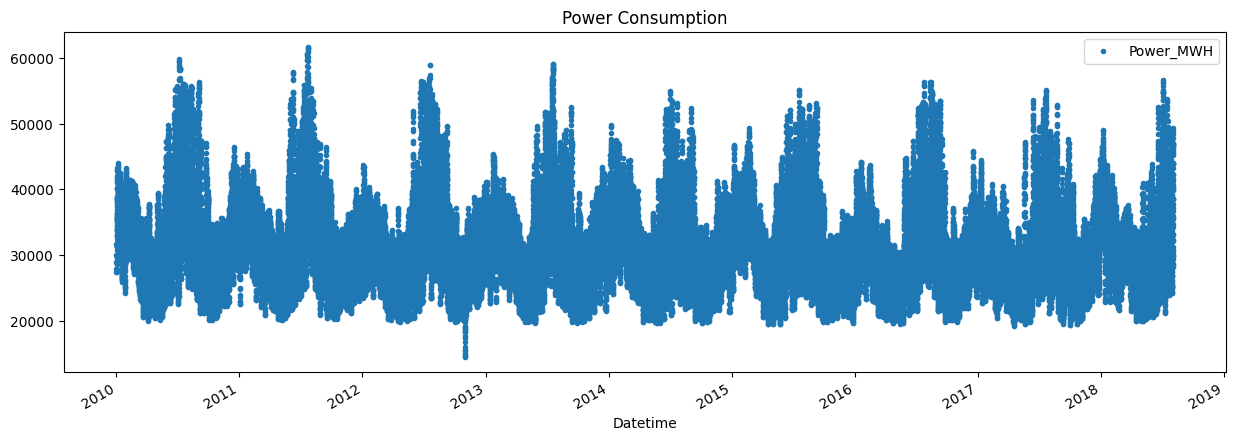

In [5]:
df_indexed.plot(style='.', figsize=(15, 5), title='Power Consumption')

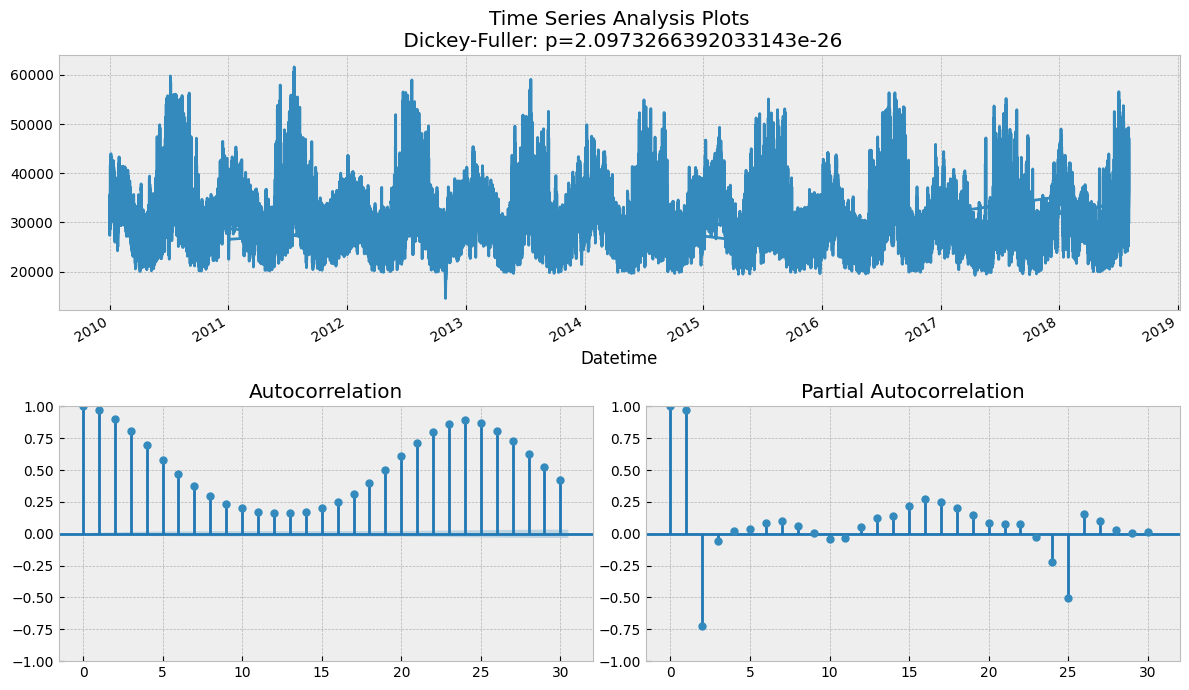

In [6]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title(f'Time Series Analysis Plots\n Dickey-Fuller: p={p_value}')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(df_indexed.Power_MWH, lags=30)

NOTE: As the p-value for the Dickey-Fuller Test is almost zero, the time series data is stationary and we can move on to prediction.

CREDIT: 
https://builtin.com/data-science/time-series-model